# Churn prediction

Building customer relationships or customer relationship management (CRM) is an important link in the functioning of any business. The success of the whole company often depends on how well the work with the audience is built. In our project we will face one of the most urgent tasks in the field of CRM: churn prediction. The essence of the task is to find in advance a segment of users who are inclined, after a certain period of time, to refuse to use a certain product or service. The exact and timely finding of such users allows you to effectively deal with their churn, for example, to identify the causes of the churn and take measures to retain customers. This task is relevant for most organizations providing services in the B2C segment and is doubly relevant in areas where the distribution of services is close to 100%. A good example of such an area is the mobile communications market, where saturation has actually occurred, and as a result, the growth of the customer base is gradually decreasing. In such a situation, the task of retaining customers and building relationships with them comes to the fore. In the process of working on our project, we expect to learn how to mathematically set the task of forecasting churn, build and optimize forecast models, assess their quality and economic potential. And, of course, we can apply the gained knowledge and experience in the future to solve a similar problem in the area of our work.

In this task, we will practice doing descriptive analysis and visualization of the so-called “closed” data - data that is provided for analyzing and building models without a description. The sample with which we will work is attached.

Class labels (here 1 corresponds to the outflow class, -1 to the non-outflow class) - orange_small_churn_labels.train
The data (provided without description, but it is known that the first 190 variables are numeric, and the remaining 40 are categorical) - orange_small_churn_data.train

In [1]:
import numpy as np
import pandas as pd

In [2]:
from scipy.stats.stats import pearsonr

In [3]:
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

In [4]:
data = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_csv('orange_small_churn_labels.train', header=None)

Let's look on our data

In [5]:
data.head(5)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [6]:
data.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,570.000000,1006.000000,1005.000000,1275.000000,1.165000e+03,35565.000000,35560.000000,0.0,570.000000,1.165000e+03,...,1.006000e+03,1006.000000,0.0,570.000000,570.00000,1006.000000,16785.000000,266.000000,0.0,0.0
mean,11.003509,0.004970,429.328358,0.148235,2.490555e+05,1319.915394,6.792126,NaN,47.487719,3.813466e+05,...,8.067657e+04,7.419483,NaN,3.515789,16.05614,165.108310,270.585523,22637.159019,NaN,NaN
std,34.952792,0.157642,4470.405915,1.396054,6.762021e+05,2609.955770,6.287285,NaN,147.137816,9.353348e+05,...,2.141650e+05,34.642351,NaN,9.412473,54.96505,113.400173,86.723561,30843.320634,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2419.965000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,196.410000,270.000000,12612.240000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.172150e+05,1435.000000,7.000000,NaN,46.000000,2.419740e+05,...,4.260950e+04,8.000000,NaN,6.000000,14.00000,250.980000,330.000000,32209.560000,NaN,NaN
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,35.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1000.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [7]:
labels.head(5)

,0
0,-1
1,-1
2,-1
3,1
4,-1


For further analysis and selection of metrics, it is desirable to understand what part of the entire dataset the classes "churn" and "non-churn" constitute.

In [8]:
print (len(labels[labels.values == 1]),'/', len(labels[labels.values == -1]))

2976 / 37024


In [9]:
data_full = data
data_full['target'] = labels

In [10]:
data_full.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,target
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


In [11]:
data_full = data_full.fillna(0)

In [12]:
from sklearn.preprocessing import LabelEncoder

Let's encode categorical variables

In [13]:
label_encoder = LabelEncoder()
for i in range(40):
    integer_encoded = label_encoder.fit_transform(data_full[data_full.columns[190 + i]].values.astype(str))
    for j in range(len(data_full)):
        if type(data_full[data_full.columns[190 + i]].values[j]) == str:
            data_full[data_full.columns[190 + i]].values[j] = integer_encoded[j]
    print(integer_encoded)

[0 0 0 ... 0 0 0]
[160 169 115 ...  88 241 158]
[ 5  0 17 ... 25 25 25]
[0 0 0 ... 0 0 0]
[22 22 22 ... 22 22 22]
[0 0 0 ... 0 0 0]
[  1 127 111 ...  18  18 172]
[1961  743 2693 ...  929 2751 2141]
[1236 3521 3463 ... 1516 2825 1346]
[   0 3020    0 ... 9417    0    0]
[0 0 0 ... 0 0 0]
[1384 1776 3589 ... 3394  670   89]
[1 1 1 ... 1 1 1]
[79 28 83 ... 36 13 43]
[1 2 2 ... 1 2 2]
[ 7 12 11 ...  4 21 21]
[ 7 10  4 ... 10 10 10]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
[5 5 5 ... 5 5 5]
[0 0 0 ... 0 0 1]
[27 43  5 ... 43 32 32]
[0 0 0 ... 0 0 0]
[   0 3922    0 ... 7112    0    0]
[0 0 0 ... 0 0 0]
[ 667  733 1470 ...  712 1185  114]
[ 4141 10558 10555 ...  3915  8364  4180]
[2 2 1 ... 2 2 1]
[12 12 12 ... 12 12 12]
[2855 2864  328 ...  752 1787 1905]
[0 4 6 ... 4 4 4]
[3696  347 2498 ... 3305 2037 1728]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
[0 1 0 ... 1 0 0]
[14 22  7 ... 12 20  7]
[0 2 3 ... 2 2 2]
[29  2 25 ...  8  8  8]
[0 2 2 ... 1 0 0]
[0 0 0 ... 0 0 0]


In [15]:
data_full = data_full.apply(pd.to_numeric)

Let's visualize distributions by class of our data

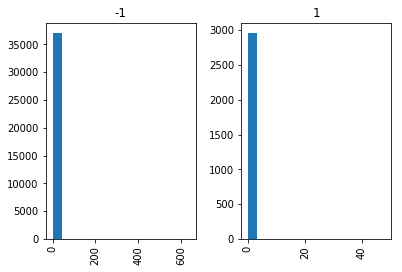

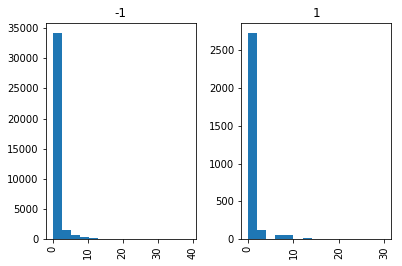

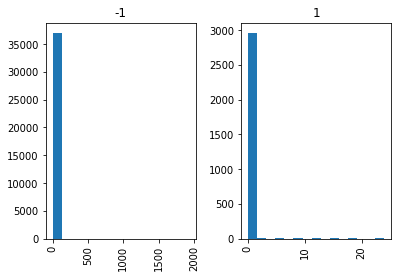

In [22]:
for i in data_full.sample(n=3, axis=1).columns:
    data_full[str(i)].hist(by=data_full['target'], bins=15)

It seems that our data is unbalanced. Therefore, we need to use cross-validation to estimate the quality of our model.

In [23]:
del data_full['target']

In [24]:
from sklearn.utils import shuffle
from sklearn import model_selection

Firstly, we need to shuffle our data to avoid effect of label ordering in our dataset

In [25]:
churn_data_shuffled = shuffle(data_full, random_state=123)
churn_labels_shuffled = shuffle(labels, random_state=123)

In [26]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(churn_data_shuffled, churn_labels_shuffled, 
                                                                                     test_size = 0.3)

In [27]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Ridge

In [28]:
ridge_classifier = RidgeClassifier(random_state = 1)
ridge_classifier.fit(train_data, train_labels.values.ravel())
ridge_predictions = ridge_classifier.predict(test_data)

c:\programdata\anaconda3\envs\test\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.364831265189639e-19 / 1.1102230246251565e-16
  RuntimeWarning)


In [29]:
ridge_classifier.coef_

array([[-8.34146640e-03, -5.63221761e-02,  1.42092478e-06,
        -7.37052011e-03, -2.56119768e-08, -1.64349929e-06,
        -2.07194543e-03,  0.00000000e+00, -5.36116931e-03,
         2.24407319e-09, -8.42890261e-03,  1.33601057e-03,
         6.32831685e-07, -5.91381270e-03,  0.00000000e+00,
        -3.68235205e-05,  1.52040988e-02, -1.22013985e-02,
         1.96886404e-02,  0.00000000e+00, -2.43685118e-05,
        -1.97755769e-05, -5.39761560e-05,  3.57783720e-04,
         1.58036704e-05,  1.58331428e-02, -2.59196541e-02,
         3.33173544e-05,  4.33678335e-02,  4.33616437e-03,
         0.00000000e+00,  0.00000000e+00, -1.60788569e-08,
         6.35996157e-03, -1.00329932e-02,  8.55598663e-09,
        -1.45198362e-08, -2.51631689e-09,  0.00000000e+00,
         1.36135067e-03,  5.95908089e-03,  0.00000000e+00,
        -5.10120441e-03, -6.52400385e-03,  8.14875273e-07,
         5.12646070e-04, -1.06684570e-03,  0.00000000e+00,
         5.26870355e-03, -9.78500497e-05, -7.13083280e-0

In [30]:
print(test_labels.values.ravel())

[-1 -1 -1 ...  1 -1 -1]


In [31]:
print(ridge_predictions)

[-1 -1 -1 ... -1 -1 -1]


In [32]:
ridge_classifier.intercept_ 

array([-0.71742046])

Next we will test different metrics for ridge classifier

## ROC AUC

In [33]:
metrics.roc_auc_score(test_labels, ridge_predictions)

0.4999096086052608

## Precision

In [34]:
metrics.precision_score(test_labels, ridge_predictions, pos_label = -1)

0.9219036506084347

In [35]:
metrics.precision_score(test_labels, ridge_predictions)

0.0

## Recall

In [36]:
metrics.recall_score(test_labels, ridge_predictions, pos_label = -1)

0.9998192172105216

In [37]:
metrics.recall_score(test_labels, ridge_predictions)

0.0

Let's estimate the quality of ridge classifier predictions using cross validation with roc-auc score.  
We will use StratifiedKFold as a cross validation strategy because of unbalanced classes of target variable values.  
Our dataset is large so we chose the number of folds = 4 in order to fit the model more or less quickly.

## cross validation

In [41]:
scorer = metrics.make_scorer(metrics.roc_auc_score)
cv_strategy = cross_validation.StratifiedKFold(labels.values.ravel(), n_folds= 4)

In [42]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, data_full, labels.values.ravel(), scoring = scorer, cv = cv_strategy)

c:\programdata\anaconda3\envs\test\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0454165366718593e-19 / 1.1102230246251565e-16
  RuntimeWarning)
c:\programdata\anaconda3\envs\test\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.068156451352505e-19 / 1.1102230246251565e-16
  RuntimeWarning)
c:\programdata\anaconda3\envs\test\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0558321296165823e-19 / 1.1102230246251565e-16
  RuntimeWarning)
c:\programdata\anaconda3\envs\test\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-cond

In [43]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.4998784572169404, max:0.49994598098530685, min:0.4998379429559205, std:4.479020082049092e-05


Let's implement the same strategy for other models like Random Forest and Gradient Boosting

# Random forest

In [44]:
rf_classifier = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)
rf_classifier.fit(train_data, train_labels.values.ravel())
rf_predictions = rf_classifier.predict(test_data)

In [45]:
metrics.roc_auc_score(test_labels, rf_predictions)

0.5

In [46]:
metrics.recall_score(test_labels, rf_predictions, pos_label = -1)

1.0

In [47]:
metrics.recall_score(test_labels, rf_predictions)

0.0

In [48]:
scorer = metrics.make_scorer(metrics.roc_auc_score)
cv_strategy = cross_validation.StratifiedKFold(labels.values.ravel(), n_folds= 4)

In [49]:
rf_scoring = cross_validation.cross_val_score(rf_classifier, data_full, labels.values.ravel(), scoring = scorer, cv = cv_strategy)

In [50]:
print('Random forest mean:{}, max:{}, min:{}, std:{}'.format(rf_scoring.mean(), rf_scoring.max(), 
                                                     rf_scoring.min(), rf_scoring.std()))

Random forest mean:0.5, max:0.5, min:0.5, std:0.0


# Gradient boosting

In [51]:
gb_classifier = GradientBoostingClassifier(n_estimators = 50, random_state = 1)
gb_classifier.fit(train_data, train_labels.values.ravel())
gb_predictions = gb_classifier.predict(test_data)

In [52]:
metrics.roc_auc_score(test_labels, gb_predictions)

0.5042048842227254

In [53]:
metrics.precision_score(test_labels, gb_predictions, pos_label = -1)

0.9268251981643721

In [54]:
metrics.precision_score(test_labels, gb_predictions)

0.5333333333333333

In [55]:
metrics.recall_score(test_labels, gb_predictions, pos_label = -1)

0.999370220422852

In [56]:
metrics.recall_score(test_labels, gb_predictions)

0.00903954802259887

In [57]:
scorer = metrics.make_scorer(metrics.roc_auc_score)
cv_strategy = cross_validation.StratifiedKFold(labels.values.ravel(), n_folds= 4)

In [58]:
gb_scoring = cross_validation.cross_val_score(gb_classifier, data_full, labels.values.ravel(), scoring = scorer, cv = cv_strategy)

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [59]:
print('Gradient boosting mean:{}, max:{}, min:{}, std:{}'.format(gb_scoring.mean(), gb_scoring.max(), 
                                                     gb_scoring.min(), gb_scoring.std()))

Gradient boosting mean:0.504756722753506, max:0.5075783449967938, min:0.5023640579548517, std:0.0018563563286102696


# XGBoost
Implementing xgboost model

In [41]:
import xgboost as xgb

In [42]:
xgb_classifier = xgb.XGBClassifier(learning_rate=0.05, max_delta_step=1, max_depth=3, min_child_weight=20, n_estimators=500, subsample=0.1) 
xgb_classifier.fit(train_data, train_labels.values.ravel(), eval_metric='auc')
xgb_predictions = xgb_classifier.predict(test_data) 
xgb_predictions_proba = xgb_classifier.predict_proba(test_data).transpose()[1]

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [43]:
metrics.roc_auc_score(test_labels, xgb_predictions_proba)

0.7298995150602964

We will improve xgb classifier

# Fine-tuning model

Let's estimate how many objects we really need to build a quality model. A sufficiently large sample is available for training and it may turn out that, starting from a certain point, the growth of the size of the training sample ceases to influence the quality of the model. Let's draw learning curves by training the model on samples of different sizes starting with a small number of objects in the training sample and gradually increasing its size with a certain step. Pay attention to sklearn.model_selection.learning_curve

In [40]:
from sklearn.model_selection import learning_curve

In [44]:
scorer = metrics.make_scorer(metrics.roc_auc_score)
cv_strategy = cross_validation.StratifiedKFold(labels.values.ravel(), n_folds= 4)

In [45]:
train_sizes, train_scores, test_scores = learning_curve(xgb_classifier, data_full, 
                                                        labels.values.ravel(), train_sizes = np.linspace(0.1, 1.0, 6),
                                                        cv=cv_strategy, scoring = 'roc_auc')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

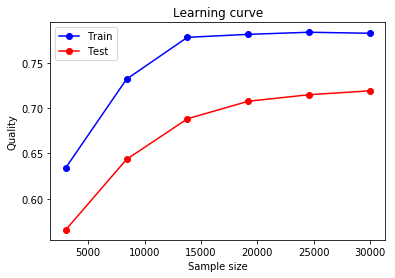

In [46]:
plt.figure()
plt.title("Learning curve")
plt.xlabel("Sample size")
plt.ylabel("Quality")

plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
    label="Train")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r",
    label="Test")
plt.legend()

## Result
As the sample size grows, the quality grows in training and, on the test

Often unbalanced by class, the samples lead to various problems when training models. Let's try differently to process the sample, play with the distribution of objects into classes and draw conclusions about how the ratio of classes affects the quality of the model.

In [47]:
weight_ratio = float(len(train_labels[train_labels[0] == -1])) / float(len(train_labels[train_labels[0] == 1]))
print(weight_ratio)

12.73222167729279


In [49]:
w1 = np.array([1]*train_labels.shape[0])
w1[train_labels[0] == -1] = 1
w1[train_labels[0] == 1] = weight_ratio
xgb_classifier.fit(train_data, train_labels.values.ravel(), sample_weight = w1, eval_metric='auc')
xgb_predictions = xgb_classifier.predict(test_data) 
xgb_predictions_proba = xgb_classifier.predict_proba(test_data).transpose()[1]
print(metrics.roc_auc_score(test_labels, xgb_predictions_proba))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7192954082425568


In [50]:
w1 = np.array([1]*train_labels.shape[0])
w1[train_labels[0] == -1] = 10
w1[train_labels[0] == 1] = 1
xgb_classifier.fit(train_data, train_labels.values.ravel(), sample_weight = w1, eval_metric='auc')
xgb_predictions = xgb_classifier.predict(test_data) 
xgb_predictions_proba = xgb_classifier.predict_proba(test_data).transpose()[1]
print(metrics.roc_auc_score(test_labels, xgb_predictions_proba))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7336477191704327


In [52]:
w1 = np.array([1]*train_labels.shape[0])
w1[train_labels[0] == -1] = 2
w1[train_labels[0] == 1] = 1
xgb_classifier.fit(train_data, train_labels.values.ravel(), sample_weight = w1, eval_metric='auc')
xgb_predictions = xgb_classifier.predict(test_data) 
xgb_predictions_proba = xgb_classifier.predict_proba(test_data).transpose()[1]
print(metrics.roc_auc_score(test_labels, xgb_predictions_proba))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7336011246734647


In [51]:
w1 = np.array([1]*train_labels.shape[0])
w1[train_labels[0] == -1] = 1
w1[train_labels[0] == 1] = 1
xgb_classifier.fit(train_data, train_labels.values.ravel(), sample_weight = w1, eval_metric='auc')
xgb_predictions = xgb_classifier.predict(test_data) 
xgb_predictions_proba = xgb_classifier.predict_proba(test_data).transpose()[1]
print(metrics.roc_auc_score(test_labels, xgb_predictions_proba))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7298995150602964


In [55]:
w1 = np.array([1]*train_labels.shape[0])
w1[train_labels[0] == -1] = 1000
w1[train_labels[0] == 1] = 1
xgb_classifier.fit(train_data, train_labels.values.ravel(), sample_weight = w1, eval_metric='auc')
xgb_predictions = xgb_classifier.predict(test_data) 
xgb_predictions_proba = xgb_classifier.predict_proba(test_data).transpose()[1]
print(metrics.roc_auc_score(test_labels, xgb_predictions_proba))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7306132887312415


The results of the classification vary. The quality of the model can both increase and decrease. Optimum - the ratio of weights of classes 10: 1

Now we apply the undersampling technology to the sample: to do this, we remove from a number of objects of larger class from training set so that the ratio of classes changes. 

In [59]:
def estimation(train_data, train_labels, test_data):
    xgb_classifier.fit(train_data, train_labels.values.ravel(), eval_metric='auc')
    xgb_predictions = xgb_classifier.predict(test_data) 
    xgb_predictions_proba = xgb_classifier.predict_proba(test_data).transpose()[1]
    return xgb_predictions_proba

In [105]:
# let's make classes of the same size
dataChurn = train_labels[train_labels[0] == 1]
dataNoChurn = train_labels[train_labels[0] == -1]
countFirst = len(dataChurn)
dataChurn = dataChurn.append(dataNoChurn.iloc[:countFirst,:])
print(metrics.roc_auc_score(test_labels, estimation(train_data.loc[list(dataChurn.index), :], train_labels.loc[list(dataChurn.index), :], test_data)))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7121413200481458


In [107]:
# making nonchurn class size is 2 times smaller than churn class size
dataChurn = train_labels[train_labels[0] == 1]
dataNoChurn = train_labels[train_labels[0] == -1]
countHalf = len(dataChurn) // 2
dataChurn = dataChurn.append(dataNoChurn.iloc[:countHalf,:])
print(metrics.roc_auc_score(test_labels, estimation(train_data.loc[list(dataChurn.index), :], train_labels.loc[list(dataChurn.index), :], test_data)))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.645548860504083


The results of the classification vary, with the highest quality with equal volume of classes.

Let's check how different strategies for processing missing values affect model quality.

In [126]:
# Nan -> mean feature value
enc_data = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_table('orange_small_churn_labels.train', header = -1, names = ["labels"])
enc_data['labels'] = labels

label_encoder = LabelEncoder()
for i in range(40):
    integer_encoded = label_encoder.fit_transform(enc_data[enc_data.columns[190 + i]].fillna(0.).values.astype(str))
    for j in range(len(enc_data)):
        if type(enc_data[enc_data.columns[190 + i]].values[j]) == str:
            enc_data[enc_data.columns[190 + i]].values[j] = integer_encoded[j]

            
for i in range(230):
    enc_data[enc_data.columns[i]] = enc_data[enc_data.columns[i]].fillna(enc_data[enc_data.columns[i]].mean())
    
    
Xy_train, Xy_test = model_selection.train_test_split(enc_data, test_size=0.3)

metrics.roc_auc_score(Xy_test['labels'], estimation(Xy_train.iloc[:, 0:230], Xy_train.iloc[:, 230], Xy_test.iloc[:, 0:230]))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7070138625946104

In [137]:
# Nan -> mode
enc_data = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_table('orange_small_churn_labels.train', header = -1, names = ["labels"])
enc_data['labels'] = labels

label_encoder = LabelEncoder()
for i in range(40):
    integer_encoded = label_encoder.fit_transform(enc_data[enc_data.columns[190 + i]].fillna(enc_data[enc_data.columns[190 + i]].mode()).values.astype(str))
    for j in range(len(enc_data)):
        if type(enc_data[enc_data.columns[190 + i]].values[j]) == str:
            enc_data[enc_data.columns[190 + i]].values[j] = integer_encoded[j]

            
for i in range(230):
    enc_data[enc_data.columns[i]] = enc_data[enc_data.columns[i]].fillna(enc_data[enc_data.columns[i]].mode())
    
    
Xy_train, Xy_test = model_selection.train_test_split(enc_data, test_size=0.3)

metrics.roc_auc_score(Xy_test['labels'], estimation(Xy_train.iloc[:, 0:230], Xy_train.iloc[:, 230], Xy_test.iloc[:, 0:230]))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7205750291961841

In [136]:
# Nan -> replace to zero
enc_data = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_table('orange_small_churn_labels.train', header = -1, names = ["labels"])
enc_data['labels'] = labels

label_encoder = LabelEncoder()
for i in range(40):
    integer_encoded = label_encoder.fit_transform(enc_data[enc_data.columns[190 + i]].fillna(0.).values.astype(str))
    for j in range(len(enc_data)):
        if type(enc_data[enc_data.columns[190 + i]].values[j]) == str:
            enc_data[enc_data.columns[190 + i]].values[j] = integer_encoded[j]

            
for i in range(230):
    enc_data[enc_data.columns[i]] = enc_data[enc_data.columns[i]].fillna(0.)
    
    
Xy_train, Xy_test = model_selection.train_test_split(enc_data, test_size=0.3)

metrics.roc_auc_score(Xy_test['labels'], estimation(Xy_train.iloc[:, 0:230], Xy_train.iloc[:, 230], Xy_test.iloc[:, 0:230]))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7154765544589146

The results of the classification vary. The highest quality gives the option of replacing nan with mode.

Let's look at how the processing of categorical features affects the quality of the model.

In [129]:
raw_data = pd.read_csv('orange_small_churn_data.train')
raw_labels = pd.read_table('orange_small_churn_labels.train', header = -1, names = ["labels"])
raw_data['labels'] = raw_labels

In [138]:
# Label Encoding
le_data = raw_data
label_encoder = LabelEncoder()
for i in range(40):
    integer_encoded = label_encoder.fit_transform(le_data[le_data.columns[190 + i]].fillna(le_data[le_data.columns[190 + i]].mode()).values.astype(str))
    for j in range(len(le_data)):
        if type(le_data[le_data.columns[190 + i]].values[j]) == str:
            le_data[le_data.columns[190 + i]].values[j] = integer_encoded[j]
for i in range(230):
    le_data[le_data.columns[i]] = le_data[le_data.columns[i]].fillna(le_data[le_data.columns[i]].mode())

train_le_data, test_le_data = model_selection.train_test_split(le_data, test_size = 0.3)

metrics.roc_auc_score(test_le_data['labels'], estimation(train_le_data.iloc[:, 0:230], train_le_data.iloc[:, 230], test_le_data.iloc[:, 0:230]))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7306804867517721

In [140]:
from collections import Counter

In [141]:
# Frequency Encoding
fr_data = raw_data

for i in range(40):
    curr_col = fr_data[fr_data.columns[190 + i]]
    counter = Counter(curr_col.values)
    for j in range(len(curr_col)):
        if type(curr_col.values[j]) == str:
            curr_col.values[j] = 1.0 * counter[curr_col.values[j]] / len(curr_col)

for i in range(230):
    fr_data[fr_data.columns[i]] = fr_data[fr_data.columns[i]].fillna(fr_data[fr_data.columns[i]].mode())

train_fr_data, test_fr_data = model_selection.train_test_split(fr_data, test_size = 0.3)

roc_auc_score(test_fr_data['labels'], estimation(train_fr_data.iloc[:, 0:230], train_fr_data.iloc[:, 230], test_fr_data.iloc[:, 0:230]))

c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.691858399046501

Label encoding is more effective than frequency encoding

# Feature selection

We can build a selection based on l1-regularization — filter out features from training set that will gain zero weight when building a regression with l1-regularization

In [143]:
indices1 = np.argsort(xgb_classifier.feature_importances_)[::-1]

In [150]:
train_df = train_le_data[train_le_data.columns[:230]]
test_df = test_le_data[test_le_data.columns[:230]]
for i in [10, 20, 50]:
    print('Number of features: ', i)
    train_le_data_selection = train_df[train_df.columns[indices1[0:i]]]
    train_le_data_selection['labels'] = train_le_data['labels']
    test_le_data_selection = test_df[test_df.columns[indices1[0:i]]]
    test_le_data_selection['labels'] = test_le_data['labels']
    print(metrics.roc_auc_score(test_le_data_selection['labels'], estimation(train_le_data_selection.iloc[:, 0:i-1], train_le_data_selection.iloc[:, i], test_le_data_selection.iloc[:, 0:i-1])))

Number of features:  10


c:\programdata\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\programdata\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7082825939644107
Number of features:  20


c:\programdata\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\programdata\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7157649630438054
Number of features:  50


c:\programdata\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\programdata\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\programdata\anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.721376244580806
